In [33]:
%load_ext autoreload
%autoreload 1
%aimport data
from data import *
import networkx as nx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Boring sample graph

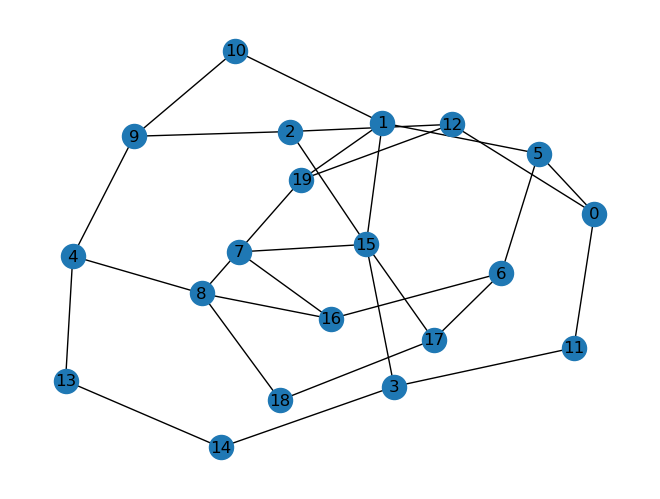

In [35]:
NUM_RAND_EDGES = 10 # 50
NUM_VERTICES = 20 # 100
g = torch_geometric.utils.to_networkx(generate_hampath_graph(NUM_VERTICES, NUM_RAND_EDGES), to_undirected=True)  # type: ignore
nx.draw_kamada_kawai(g, with_labels = True)  # type: ignore

In [59]:
# Generate dataset
NUM_GRAPHS = 10
NUM_VERTS = 30
DELTA_V = 0
NUM_EDGES = 10
DELTA_E = 10
PATH = 'data'
generate_and_save_corpus(NUM_GRAPHS, NUM_VERTS, DELTA_V, NUM_EDGES, DELTA_E, PATH)

Generating graphs...


100%|██████████| 10/10 [00:00<00:00, 223.02it/s]


torch.Size([30, 30])


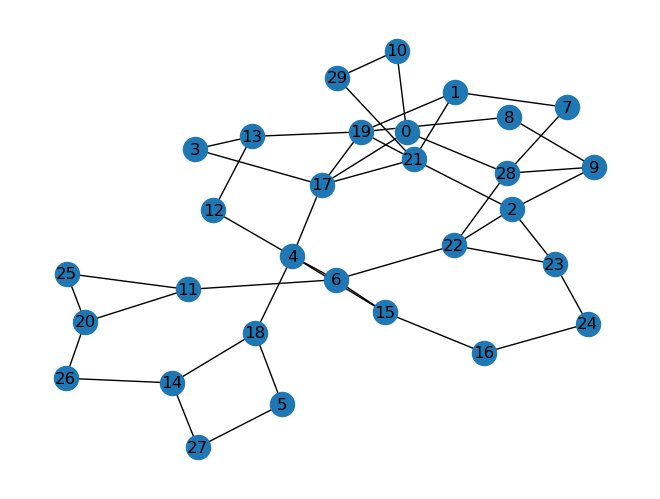

In [64]:
# Load dataset
graphs = load_corpus('data')
print(graphs[1].x.size())
nx.draw_kamada_kawai(torch_geometric.utils.to_networkx(graphs[8], to_undirected=True), with_labels=True)  # type: ignore
